### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

#### Notebook by *Abhishek Verma*

In [96]:
import numpy as nm
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Get the required dataset

In [2]:
train=pd.read_csv("Desktop/twitter data/train_E6oV3lV.csv")
test = pd.read_csv("Desktop/twitter data/test_tweets_anuFYb8.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.shape

(31962, 3)

## Explore the raw data

In [5]:
for i in range(10):
    print(train.values[i][2],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo   

 @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦ 

the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl 

we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦  

 @user @user welcome here !  i'm   it's so #gr8 !  



## Check if there is any null values

In [6]:
train.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## explore the tweets which contains racist/sexist contents

In [8]:
c=0
for i in range(len(train)):
    if train["label"][i]==1:
        c+=1
        print(train["tweet"][i])
        if c==10:
            break

@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  
no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins
retweet if you agree! 
@user @user lumpy says i am a . prove it lumpy.
it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia 
@user lets fight against  #love #peace 
ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness  
@user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦
how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    
@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


# combine the train and test dataset so that to apply pre processing on both at once

In [9]:
combo = train.append(test, ignore_index=True)

C:\Users\Verma\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
combo.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [11]:
combo.shape

(49159, 3)

In [12]:
train.shape[0]== combo.shape[0]-test.shape[0]

True

### remove @[user] as it doesnt provide any important information

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [14]:
combo["tidy_tweet"]=nm.vectorize(remove_pattern)(combo['tweet'],"@[\w]*")

In [15]:
combo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### Remove non alphabetical characters includes emoticons and numbers

In [16]:
combo['tidy_tweet'] = combo['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [17]:
combo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [18]:
combo["tidy_tweet"][3]

'#model   i love u take with u all the time in ur                                      '

In [19]:
combo["tweet"][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

## Perform Tokenization

In [20]:
tokenize_tweet=combo["tidy_tweet"].apply(lambda x: x.split())

In [21]:
tokenize_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

## Perform Stemming 

In [22]:
from nltk.stem.porter import *

In [23]:

stemmer = PorterStemmer()

tokenize_tweet = tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenize_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: tidy_tweet, dtype: object

### Join the stemming words to a string because TF-IDF accepts string as a input

In [24]:
for i in range(len(tokenize_tweet)):
    tokenize_tweet[i]= " ".join(tokenize_tweet[i])
combo["tidy_tweet"]=tokenize_tweet

In [25]:
for i in range(10):
    print(tokenize_tweet[i])

when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run
thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank
bihday your majesti
#model i love u take with u all the time in ur
factsguid societi now #motiv
huge fan fare and big talk befor they leav chao and pay disput when they get there #allshowandnogo
camp tomorrow danni
the next school year is the year for exam can t think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
we won love the land #allin #cav #champion #cleveland #clevelandcavali
welcom here i m it s so #gr


In [26]:
combo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguid societi now #motiv


In [27]:
token=combo["tidy_tweet"].apply(lambda x: x.split())

In [28]:
token[0]


['when',
 'a',
 'father',
 'is',
 'dysfunct',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drag',
 'hi',
 'kid',
 'into',
 'hi',
 'dysfunct',
 '#run']

In [29]:
from nltk.corpus import stopwords

In [30]:
stop_words= set(stopwords.words("english"))


## remove stop words

In [94]:
for x in range(len(token)):
    token[x]=[w for w in token[x] if not w in stop_words ]

In [33]:
for i in range(len(token)):
    token[i]=" ".join(token[i])
combo["tidy_tweet"]=token

In [34]:
combo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## visualise the racist/sexist words

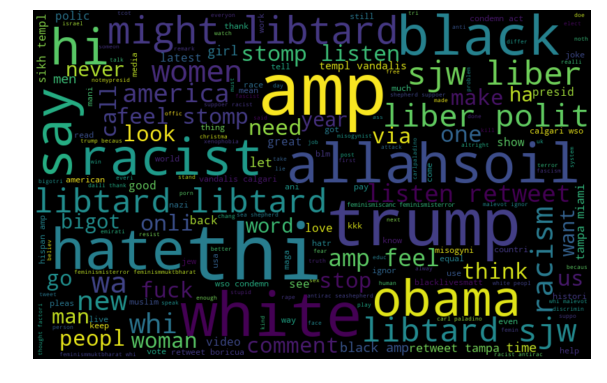

In [35]:
negative_words = ' '.join([text for text in combo['tidy_tweet'][combo['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Tranform the input string of words to numbers because machine learning models take input as numbers to train themselves

In [37]:
tdidf_vectorizer=TfidfVectorizer()

In [38]:
tfidf=tdidf_vectorizer.fit_transform(combo["tidy_tweet"])

In [39]:
len(tdidf_vectorizer.get_feature_names())

41445

In [40]:
combo["tidy_tweet"].shape

(49159,)

In [41]:
tfidf

<49159x41445 sparse matrix of type '<class 'numpy.float64'>'
	with 370075 stored elements in Compressed Sparse Row format>

In [42]:
train_data=tfidf[:31962,:]
test_data=tfidf[31962:,:]

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
train_x,test_x,train_y,test_y=train_test_split(train_data,train['label'],test_size=.3)

In [45]:
train_x

<22373x41445 sparse matrix of type '<class 'numpy.float64'>'
	with 168379 stored elements in Compressed Sparse Row format>

 # Train Logistic Model

In [46]:
lg=LogisticRegression()

In [47]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
test_x

<9589x41445 sparse matrix of type '<class 'numpy.float64'>'
	with 72444 stored elements in Compressed Sparse Row format>

In [49]:
prediction=lg.predict(test_x)

In [50]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
lg.score(test_x,test_y)

0.9472312024194389

# Our Model gives nearly 95% accuracy

In [52]:
test_x

<9589x41445 sparse matrix of type '<class 'numpy.float64'>'
	with 72444 stored elements in Compressed Sparse Row format>

In [53]:
test_data

<17197x41445 sparse matrix of type '<class 'numpy.float64'>'
	with 129252 stored elements in Compressed Sparse Row format>

In [54]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [55]:
result=lg.predict(test_data)

In [56]:
from sklearn.metrics import f1_score
prediction1=lg.predict_proba(test_x)
prediction_int = prediction1[:,1] >= 0.3
prediction_int = prediction_int.astype(nm.int)

f1_score(test_y, prediction_int)

0.6087768440709618

# F1 score is .6 out of 1

In [57]:
combo["tidy_tweet"][9]

'welcom #gr'

In [58]:
sample_submission=pd.read_csv("Desktop/twitter data/sample_submission.csv")

In [59]:
sample_submission.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [60]:
result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
c=0
for i in result:
    if result[i]==0:
        c+=1
print(c)

17197


In [62]:
len(result)

17197

## Lets give a sample input string by a user 

In [77]:
sample_text=pd.Series(["@user @abhishek we love to wear black clothes but dont love black people #racist"])

In [78]:
sample_text=nm.vectorize(remove_pattern)(sample_text,"@[\w]*")

In [79]:
sample_text=pd.Series(sample_text)

In [80]:
sampled=sample_text.apply(lambda x: x.split())

In [81]:
sampled = sampled.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [82]:
sampled.values

array([list(['we', 'love', 'to', 'wear', 'black', 'cloth', 'but', 'dont', 'love', 'black', 'peopl', '#racist'])],
      dtype=object)

In [83]:
sampled[0]=[w for w in sampled[0] if not w in stop_words or w =="not"]

In [84]:
sampled.values

array([list(['love', 'wear', 'black', 'cloth', 'dont', 'love', 'black', 'peopl', '#racist'])],
      dtype=object)

In [85]:
for i in range(len(sampled)):
    sampled[i]=" ".join(sampled[i])
x=sampled

In [86]:
x

0    love wear black cloth dont love black peopl #r...
dtype: object

In [87]:
sample_tfidf=tdidf_vectorizer.transform(x)

In [88]:
len(tdidf_vectorizer.get_feature_names())

41445

In [91]:
lg.predict(sample_tfidf)[0]

1

#### 1 implies racist/sexist content